In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import os
data_path = os.getcwd()
data_path = os.path.join("\\".join(data_path.split("\\")[0:-1]),"data")


artists = pd.read_csv(data_path + "\\artists.csv",sep=";")
charts = pd.read_csv(data_path + "\\radio357_charts.csv",sep=";")
tracks = pd.read_csv(data_path + "\\tracks.csv",sep=";")


charts["chart_date"] = pd.to_datetime(charts["chart_date"],format = "%d.%m.%Y")

## Most recent chart

In [5]:
##check if exists same song title with diff artist
s = tracks.groupby("track")["artist"].nunique()
s[s>1]

Series([], Name: artist, dtype: int64)

In [6]:
def chart_streak(name :str,type :str,end_chart_no:int):
    if type in ["track","artist"]:
        s = charts[(charts[type] == name) & (charts["chart_no"] <= end_chart_no)]["chart_no"].sort_values().diff()
        if s[s==1].count() ==0:
            return None
        return s[s==1].count()
    return None
#print(chart_streak("Kate Bush","artist",35))
#chart_streak("JAŚNIEJĄCA","track",35)

In [7]:
df = charts[charts["chart_no"] == charts["chart_no"].max()]
df["track's consecutive weeks"] =df.apply(lambda r: chart_streak(r["track"],"track",r["chart_no"]),axis=1)

df_prev = charts[charts["chart_no"] == charts["chart_no"].max()-1][["track","position"]]

chart_last = pd.merge(df,df_prev,how="left",on = "track",suffixes=["","_prev"])
chart_last["position change"] =  chart_last["position_prev"] -chart_last["position"]

chart_last["track's consecutive weeks"] = chart_last["track's consecutive weeks"].astype("Int16")
chart_last["position change"] = chart_last["position change"].astype("Int32")
chart_last.drop(columns = ["chart_no","position_prev","chart_date"]).set_index("position")


C:\Users\Maciek\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,artist,track,track's consecutive weeks,position change
position,,,,
1,Kate Bush,Running Up That Hill,3,0
2,Dawid Podsiadło,Post,2,0
3,Dawid Tyszkowski,KOSZULKA,8,0
4,Brodka,Sadza,<NA>,<NA>
5,Fisz Emade Tworzywo,OK BOOMER!,35,-1
6,Ørganek,Samoloty,2,0
7,Kaśka Sochacka,NIEBO BYŁO RÓŻOWE,31,1
8,Florence And The Machine,KING,16,-3
9,Męskie Granie Orkiestra 2021,"I CIEBIE TEŻ, BARDZO",36,-2


## Top 3 songs with most consecutive weeks - position history

In [8]:
def track_positions_get(track:str,end_chart_no:int,chart_num:int):
    mask = (charts["track"] == track) & ((charts["chart_no"]<= end_chart_no) & (charts["chart_no"] >= end_chart_no - chart_num))
    return charts.sort_values("chart_no")[mask]

# d1 = track_positions_get("ZA MAŁO CZASU",35,34) 
# d2 = track_positions_get("I CIEBIE TEŻ, BARDZO",35,34)

In [9]:
top3 =  chart_last.sort_values("track's consecutive weeks",ascending=False).head(3)
top3_pos = []
for index, row in top3 .iterrows():
    top3_pos.append(track_positions_get(row["track"],row["chart_no"],row["track's consecutive weeks"]))

top3_pos_df = pd.concat(top3_pos)
top3_pos_df["artist_track"] = top3_pos_df["artist"] + " " + top3_pos_df["track"]
top3_pos_df = top3_pos_df.pivot(index="chart_date",columns="artist_track",values="position")
#top3_pos_df

C:\Users\Maciek\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


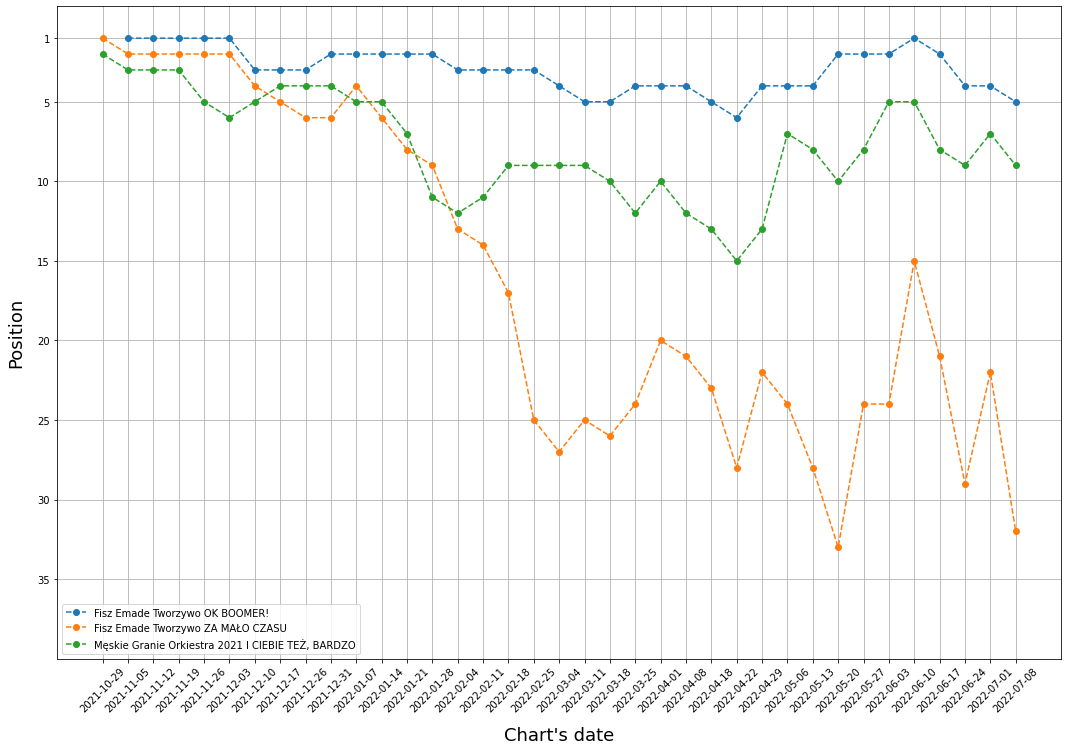

In [10]:
plt.figure(figsize=(18,12))
plt.xlabel("Chart's date",fontsize=18,labelpad=12)
plt.ylabel("Position",fontsize=18,labelpad=12)
for c in top3_pos_df.columns:
    plt.plot(top3_pos_df.index.astype("str"),top3_pos_df[c].values, label = c,marker = "o",linestyle ="dashed")
ax = plt.gca()
plt.ylim(-1,40)
plt.yticks( [t for t in range(1,40) if t == 1 or t % 5 ==0])
plt.xticks(rotation=45)
plt.grid()
ax.invert_yaxis()
plt.legend()
plt.show()

## Trending
track gained position in 3 weeks in row

In [11]:
charts_t = charts.copy()
charts_t["curr"] = charts_t["artist"] + charts_t["track"] + charts_t["chart_no"].astype("str")
charts_t["prev"] = charts_t["artist"] + charts_t["track"] + (charts_t["chart_no"] +1).astype("str")
charts_t =  pd.merge(charts_t,charts_t[["prev","position"]],how="left", left_on = "curr",right_on="prev", suffixes=["","_prev"])

charts_t["pos_diff"] = charts_t["position"] - charts_t["position_prev"]
mask = (charts_t["chart_no"]>= charts_t["chart_no"].max() -3) & (charts_t["pos_diff"]>0)
charts_t[mask].groupby("track").agg(["sum","count"])
charts_t = charts_t[mask].groupby(["artist","track"]).agg(
    positions_gained = ("pos_diff","sum"),
    c = ("pos_diff","count")
)
charts_t["positions_gained"] = charts_t["positions_gained"].astype("Int16")
charts_t[charts_t["c"]==3].drop(columns ="c").sort_values("positions_gained",ascending = False)


,,positions_gained
artist,track,
Fisz Emade Tworzywo,ZA MAŁO CZASU,24
Kaśka Sochacka & Kortez,DLA MNIE TO JUŻ KONIEC,17
T.Love feat. Kasia Sienkiewicz,POCHODNIA,17
Michelle Gurevich,GOODBYE MY DICTATOR,12
Grzegorz Turnau & Igor Herbut,ZUPA NA PLANTACH,9
Pablopavo i Ludziki,PROWADZIMY CZYNNOŚCI,8
Męskie Granie Orkiestra 2022,JEST TYLKO TERAZ,7
Rammstein,ZEIT,7
Męskie Granie Orkiestra 2021,"I CIEBIE TEŻ, BARDZO",6


## Last chart - comparision with song popularity on spotify

In [12]:

tracks.dropna(inplace=True)
tracks["date"] = pd.to_datetime(tracks["date"],format="%Y-%m-%d")


 
closest_date = tracks["date"].drop_duplicates().to_frame()
closest_date["last_chart_date"] = df["chart_date"].max()
closest_date["diff"] = (closest_date["date"] - closest_date["last_chart_date"]).abs()
closest_date = closest_date.sort_values("diff")["date"].head(1).max()
#closest_date
chart_last_vs_spot = pd.merge(chart_last,tracks[tracks["date"] ==closest_date][["artist","track","track_popularity"]],how="left",left_on=["artist","track"], right_on=["artist","track"],suffixes=["","_spot"])
chart_last_vs_spot = chart_last_vs_spot[chart_last_vs_spot["track_popularity"].notna()]
chart_last_vs_spot["position_popularity"] = chart_last_vs_spot["track_popularity"].rank(method ="min",ascending=False).astype("Int32")
chart_last_vs_spot["position_diff"] = chart_last_vs_spot["position"] - chart_last_vs_spot["position_popularity"]
chart_last_vs_spot.set_index(["artist","track"])[["position_popularity","position","position_diff","track_popularity"]].rename(columns={"position":"position_chart"}).sort_values("position_popularity")


,,position_popularity,position_chart,position_diff,track_popularity
artist,track,,,,
Kate Bush,Running Up That Hill,1,1,0,92.0
Lady Gaga,HOLD MY HAND,2,34,32,85.0
Rammstein,ZEIT,3,14,11,74.0
Florence And The Machine,KING,4,8,4,68.0
Męskie Granie Orkiestra 2021,"I CIEBIE TEŻ, BARDZO",4,9,5,68.0
Quebonafide,Refren trochę jak Lana Del Rey,4,12,8,68.0
Dawid Podsiadło,Post,7,2,-5,67.0
Megadeth,We'll Be Back,8,29,21,66.0
Męskie Granie Orkiestra 2022,JEST TYLKO TERAZ,9,11,2,61.0


## Top 10 popular artists

In [13]:
artitst_pop = charts.groupby("artist").agg(
    num_of_unique_songs_in_charts = ("track","nunique"),
    avg_position = ("position","mean"),
    charts_count = ("chart_no","nunique")
)
artist_pop_foll = artists[artists["date"] == artists["date"].max()].set_index("artist")[["artist_followers","artist_popularity"]]

artitst_pop = artitst_pop.join(artist_pop_foll,how = "left").dropna().sort_values(["charts_count","avg_position"],ascending=(False,True)).head(10)
artitst_pop

,num_of_unique_songs_in_charts,avg_position,charts_count,artist_followers,artist_popularity
artist,,,,,
Kaśka Sochacka,2,7.964912,37,57778.0,52.0
Męskie Granie Orkiestra 2021,2,10.511628,37,157429.0,55.0
Fisz Emade Tworzywo,3,10.844156,37,101566.0,43.0
Krzysztof Zalewski,3,15.040816,37,190892.0,54.0
Bluszcz,2,19.837838,37,8048.0,35.0
Daria Zawiałow,2,19.704545,34,325507.0,61.0
Archive,3,23.714286,34,236707.0,47.0
Eddie Vedder,3,25.823529,33,1399088.0,60.0
Ralph Kaminski,4,23.083333,32,130481.0,55.0


## Top 10 popular genres

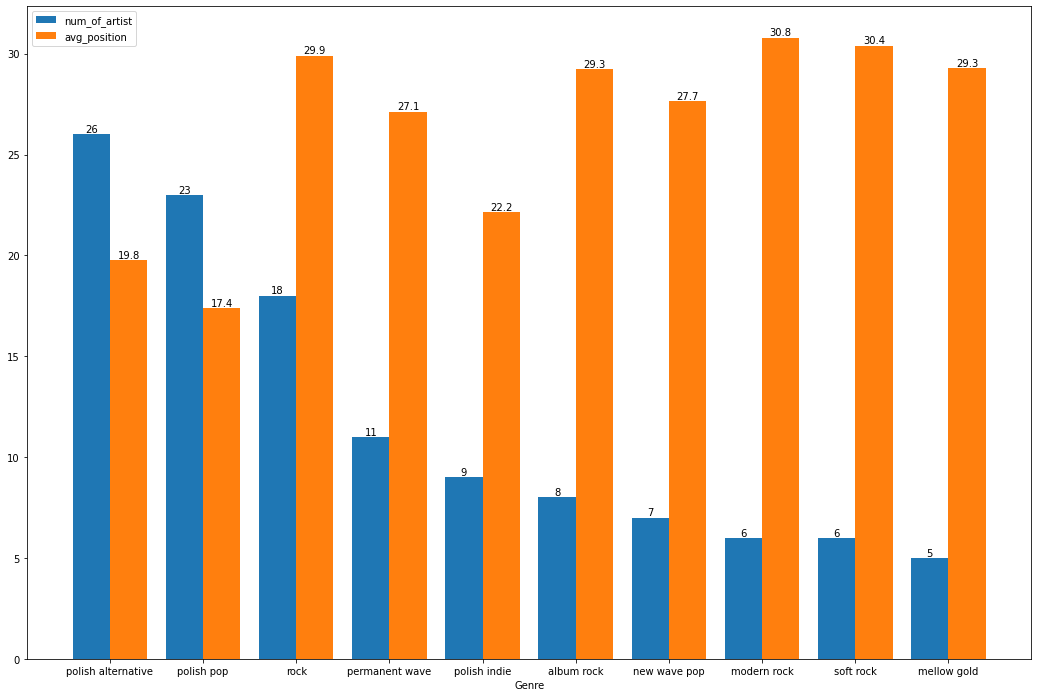

In [14]:
ag = artists[["artist","artist_genres"]].dropna()
#ag["artist_genres"].str.split(",",expand=True)
ag = ag.join(ag["artist_genres"].str.split(",",expand=True))
ag.drop(columns = "artist_genres",inplace=True)
cols_l = ag.columns.to_list()
cols_l.remove("artist")
ag = pd.melt(ag,id_vars = "artist",value_vars=cols_l,value_name = "genre")
ag.dropna(inplace=True)
ag.drop(columns = "variable",inplace=True)
ag.drop_duplicates(inplace=True)
ag.set_index("artist",inplace=True)



charts_ag =pd.merge(charts,ag,how="left",left_on="artist",right_index=True)
charts_ag.dropna(inplace=True)

charts_ag = charts_ag.groupby(["genre"]).agg(
    num_of_artist = ("artist","nunique"),
    avg_position = ("position","mean")
)
charts_ag = charts_ag.sort_values("num_of_artist",ascending=False).head(10)
xl = charts_ag.index.to_list()
xt = pd.Series(range(1,len(xl)+1))
xt
plt.figure(figsize=(18,12))


b_num = plt.bar(xt-0.2,charts_ag["num_of_artist"],width=0.4, label = "num_of_artist",align="center")
b_avg =plt.bar(xt+0.2,charts_ag["avg_position"],width=0.4,label = "avg_position",align="center")
plt.xticks(xt,labels=xl)
plt.xlabel("Genre")
plt.legend(loc = "upper left")
plt.bar_label(b_num,charts_ag["num_of_artist"])
plt.bar_label(b_avg,charts_ag["avg_position"].round(decimals =1))
plt.show()

